# Análisis: Coffee Bot

# Contenido

1. [Descripción del análisis](#Descripción-del-análisis)


2. [Descripción de los datos](#Descripción-de-los-datos)


3. [Corrección de datos](#Corrección-de-datos)
    

4. [Análisis de los establecimientos](#Análisis-de-los-establecimentos)


5. [Conclusión](#Conclusión)

## Descripción del análisis
<a id="Descripción del análisis"></a>

Coffee Bot es un pequeño café cuya propuesta de valor es ser atendido por robots, este café se ha decidido ubicar en la ciudad de Los Ángeles California. Debido a que el proyecto es prometedor pero caro se realizará un previo análisis de las condiciones actuales del mercado, esto con la finalidad de atraer inversionistas.
En este análisis se buscará: 
1. Investigar las proporciones de los distintos tipos de establecimientos. 
2. Investigar las proporciones de los establecimientos que pertenecen a una cadena y de los que no.
3. El tipo de establecimiento que es habitualmente una cadena.
4. Lo que caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos.
5. El promedio de número de asientos para cada tipo de restaurante.
6. Las diez mejores calles por número de restaurantes.
7. El número de calles que solo tienen un restaurante.
8. La distribución del número de asientos para las calles con muchos restaurantes.

## Descripción de los datos
<a id="Descripción de los datos"></a>

In [1]:
# Importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga de datos 
data = pd.read_csv("/datasets/rest_data_us_upd.csv")

In [3]:
# Vista general de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
# 10 primeras filas 
data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


Al observar la información general a simple vista se puede observar que únicamente existen valores ausentes en una columna, el dataset cuenta con 6 columnas y 9651 filas. 

## Corrección de datos
<a id="Corrección de datos"></a>

In [5]:
# Buscamos datos duplicados
print(data.duplicated().sum())

0


In [6]:
# Buscamos valores ausentes
print(data.isna().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


In [7]:
# Mostramos cuantos valores ausentes tiene year_of_release
print(data[data["chain"].isna()])

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  


In [8]:
# Rellenamos los valores ausentes 
data["chain"].fillna("False", inplace=True)

In [9]:
# Comprobamos los valores ausentes
print(data.isna().sum())

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


In [10]:
# Cambiamos el tipo de dato de la columna chain
data["chain"] = data["chain"].astype("bool")
print(data["chain"].dtype)

bool


Para la corrección de los datos primero se buscaron valores duplicados y valores ausentes, al solo encontrar valores ausentes estos fueron cambiados por el valor False, esto debido a que estos establecimientos no pertenecen a cadenas, y por último se cambió el tipo de valores de la columna "chain". 

## Análisis de los estabecimientos
<a id="Análisis de los establecimientos"></a>

**Investiga las proporciones de los distintos tipos de establecimientos.**

In [11]:
# Elegimos un estilo para los graficos
sns.set_style("whitegrid")
# Elegimos la paleta de colores 
sns.set_palette("Paired")

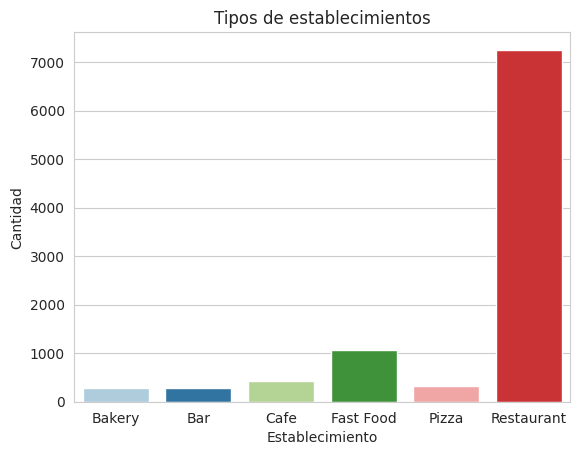

In [12]:
# Grafica de los tipos de establecimiento 
sorted_data = data.sort_values(by="object_type")
sns.countplot(data=sorted_data, x="object_type")
# Agragamos titulo y nombre de los ejes
plt.title("Tipos de establecimientos")
plt.xlabel("Establecimiento")
plt.ylabel("Cantidad")
plt.show()

Como podemos observar en el grafico el establecimiento que más predomina en la ciudad de Los Ángeles son los restaurantes, para las cafeterías esto es distinto ya que existen poco menos de 1000 de ellos en la ciudad.

**Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no.**

In [18]:
# Buscamos la cantidad de establecimientos de cadena y no cadena 
chain_counts = data["chain"].value_counts()
chain_counts

False    5972
True     3679
Name: chain, dtype: int64

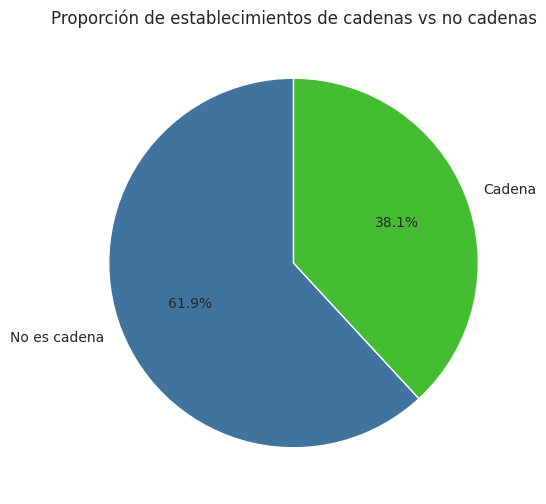

In [23]:
# Nombramos etiquetas y valores 
labels = ["No es cadena", "Cadena"]
values = chain_counts.values
colors = ["#40739e", "#44bd32"]
# Grafica circular
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
# Agregamos titulo al grafico
plt.title("Proporción de establecimientos de cadenas vs no cadenas")
plt.show()

En la gráfica podemos ver que los establecimientos que no pertenecen a alguna cadena representan el 61.9% de los establecimientos totales en Los Ángeles, mientras que los establecimientos que pertenecen a cadenas solo representan el 38.1%. Esto nos dice que la tendencia en los establecimientos es no pertenecer a alguna cadena.  

**¿Qué tipo de establecimiento es habitualmente una cadena?**

In [27]:
# Filtramos para encontrar solo los True
filtered_chain = data[data["chain"] == True]
chain_establishment = filtered_chain.groupby("object_type")["chain"].count()
chain_establishment = chain_establishment.reset_index()
chain_establishment.columns = ["object_type", "total"]
chain_establishment

,object_type,total
0,Bakery,283
1,Bar,77
2,Cafe,266
3,Fast Food,605
4,Pizza,154
5,Restaurant,2294


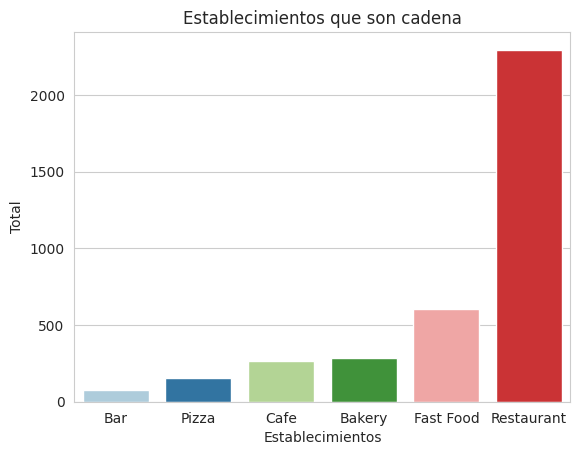

In [28]:
# Grafica de los establecimientos que son cadena
sns.barplot(data=chain_establishment.sort_values("total"), x="object_type", y="total")
# Agregamos titulo y nombre a los ejes
plt.title("Establecimientos que son cadena")
plt.xlabel("Establecimientos")
plt.ylabel("Total")
plt.show()

De los establecimientos que más son cadenas en comparación con los demás los restaurantes están en la primera posición, seguido por la comida rápida, para las cafeterías solo existen 266 que pertenecen a las cadenas.

**¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?**

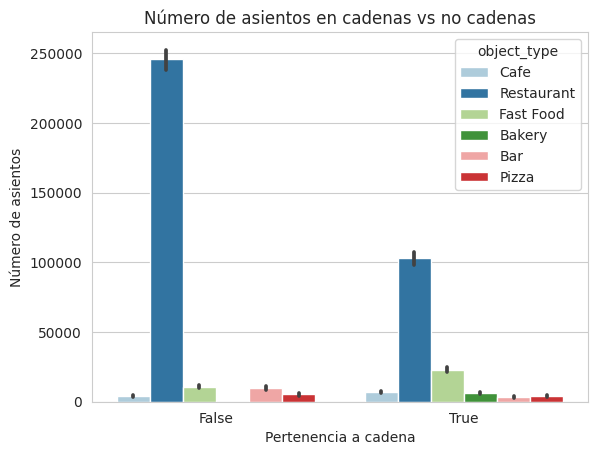

In [29]:
# Grafica de establecimientos por asientos
sns.barplot(x="chain", y="number", hue="object_type", data=data, estimator=sum)
# Agregamos titulo y nombre a los ejes
plt.title("Número de asientos en cadenas vs no cadenas")
plt.xlabel("Pertenencia a cadena")
plt.ylabel("Número de asientos")
plt.show()

Como podemos ver en la gráfica los establecimientos que pertenecen a una cadena tiene menos asientos que los que no pertenecen a alguna cadena. Los restaurantes que no pertecen a las cadenas son los que en conjunto tiene más asientos, considerando que los restaurantes representan una cantidad considerale del total de establecimientos.

**Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?**

In [41]:
# Calcularmos el promedio de asientos por tipo de restaurante
average_seats = data.groupby("object_type")["number"].mean().sort_values()
average_seats = average_seats.reset_index()
average_seats.columns = ["object_type", "average"]
average_seats.round(2)

,object_type,average
0,Bakery,21.77
1,Cafe,25.00
2,Pizza,28.46
3,Fast Food,31.84
4,Bar,44.77
5,Restaurant,48.04


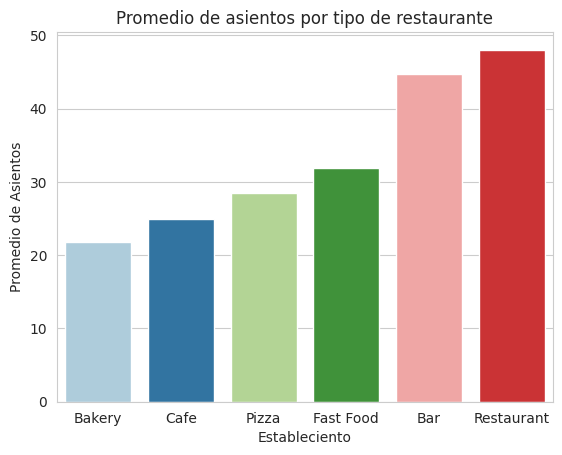

In [42]:
# Grafica de el promedio de asientos por tipo de restaurante
sns.barplot(data=average_seats, x="object_type", y="average")
# Agremanos titulo y nombre de ejes
plt.title("Promedio de asientos por tipo de restaurante")
plt.xlabel("Estableciento")
plt.ylabel("Promedio de Asientos")
plt.show()

En promedio las cafeterías son el segundo establecimiento que menos tiene asientos con un promedio de 25 asientos por cafetería. Las panaderias son de los establecimientos que menos tienen asientos con un promedio de 22 asientos. Los bares y los restaurantes son los en promedio tiene más asientos.

**Coloca los datos de los nombres de las calles de la columna address en una columna separada.**

In [30]:
# Creamos una columna con los nombres de las calles
data["street"] = data["address"].str.split(n=1).str[1]
data.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


**Traza un gráfico de las diez mejores calles por número de restaurantes.**

In [31]:
# Buscamos las 10 calles con más establecimientos 
street_counts = data["street"].value_counts().head(10)
street_counts = street_counts.reset_index()
street_counts.columns = ["street", "total"]
street_counts

,street,total
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,S WESTERN AVE,128


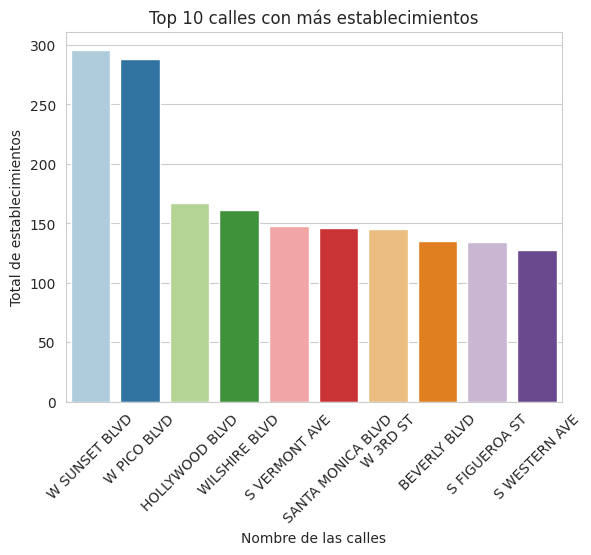

In [45]:
# Grafica con las calles con más establecimientos
sns.barplot(data=street_counts, x="street", y="total")
# Agregamos titulo y nombre de los ejes
plt.title("Top 10 calles con más establecimientos")
plt.xlabel("Nombre de las calles")
plt.ylabel("Total de establecimientos")
plt.xticks(rotation=45)
plt.show()

La calle más popular es W Sunset Blvd con 296 establecimientos y con 288 establecimientos esta la calle W Pico Blvd, las demás calles tienen menos de 200 establecimientos. 

**Encuentra el número de calles que solo tienen un restaurante.**

In [46]:
# Buscamos las calles que solo tienen un establecimento
streets_count = data["street"].value_counts()
streets_single_establishment = (streets_count == 1).sum()
print(f"Número de calles con un solo restaurante: {streets_single_establishment}")

Número de calles con un solo restaurante: 2450


In [47]:
# Total de calles
data["street"].nunique()

3077

De las 3077 calles proporcionadas para este análisis existen 2450 calles en las que solamente se encuentra un establecimiento.

**Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?**

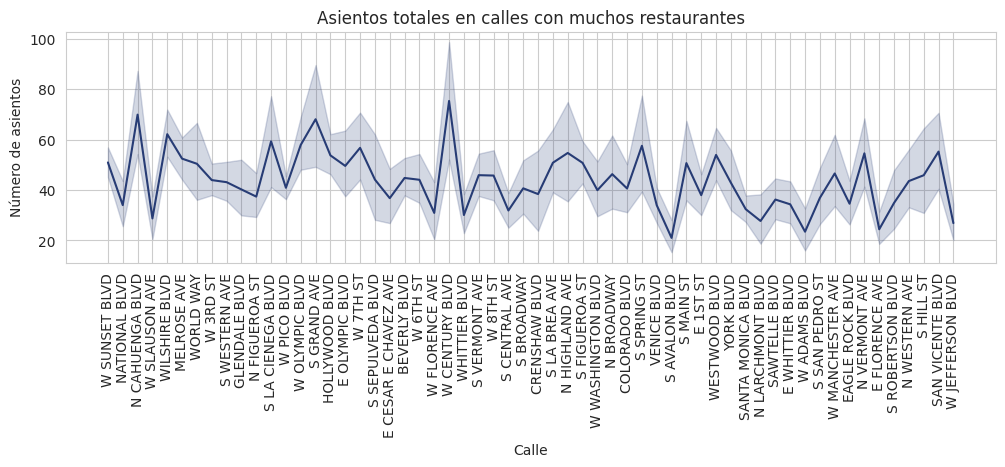

In [48]:
# Buscamos las calles con más de 30 establecimientos
popular_streets = streets_count[streets_count > 30].index

# Grafica de las calles con muchos establecimientos
plt.figure(figsize=(12, 3))
sns.lineplot(x="street", y="number", data=data[data["street"].isin(popular_streets)], color="#273c75")
# Agregamos titulo y nombre a los ejes
plt.title("Asientos totales en calles con muchos restaurantes")
plt.xlabel("Calle")
plt.ylabel("Número de asientos")
plt.xticks(rotation=90)
plt.show()

En las calles con más de 30 establecimientos se puede observar que existen algunas calles donde el número de asientos se reduce considerablemente hasta llegar a 20 asientos, y otras calles en donde casi llega a los 100 asientos por calle. El promedio de las calles tienen entre 40 a 60 asientos por calle.

## Conclusión 
<a id="Conclusión "></a>

Después de realizar el análisis se puede concluir que en la ciudad de Los Ángeles no existen tantos establecimientos de cafeterías solo representan el 4.50% de los establecimientos existentes en la ciudad, en comparación con los restaurantes que representan un 75.17%.
De las 435 cafeterías existentes 266 pertenecen a cadenas, esto nos dice que poco más de la mitad de las cafeterías pertenecen a cadenas. Las cafeterías pertenecientes a las cadenas tienen más asientos que las que no pertenecen a alguna cadena.
En promedio todas las cafeterías ya sean pertenecientes a alguna cadena o no tienen 25 asientos por cafetería.

A pesar de que más de la mitad de los establecimientos sean una cadena en comparación con establecimientos como restaurantes donde los pertenecientes a las cadenas son menos que los que si pertenecen a una cadena, es recomendable no pertenecer a una cadena, además es probable que la cafetería tenga que realizar ciertos cambios para poder ser parte de una cadena pudiendo dejar de lado la propuesta de valor inicial.

Presentación: https://drive.google.com/file/d/1MhQrzV0HuE0MGGwRP3PGnkuFiRzP_xu-/view?usp=drive_link